In [1]:
import bz2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import re

In [ ]:
with bz2.open("/Users/longhaochen/chess/chess/data/lichess_db_standard_rated_2017-04.pgn.bz2", "rb") as f:
    data = f.read()

In [ ]:
%%time
data = str(data) # Convert binary data into string for easier functionality

In [4]:
print(data[0:1000])

b'[Event "Rated Blitz game"]\n[Site "https://lichess.org/tGpzk7yJ"]\n[White "calvinmaster"]\n[Black "dislikechess"]\n[Result "1-0"]\n[UTCDate "2017.03.31"]\n[UTCTime "22:00:01"]\n[WhiteElo "2186"]\n[BlackElo "1907"]\n[WhiteRatingDiff "+4"]\n[BlackRatingDiff "-4"]\n[ECO "C34"]\n[Opening "King\'s Gambit Accepted, Schallopp Defense"]\n[TimeControl "180+0"]\n[Termination "Normal"]\n\n1. e4 { [%clk 0:03:00] } e5 { [%clk 0:03:00] } 2. f4 { [%clk 0:02:58] } exf4 { [%clk 0:02:58] } 3. Nf3 { [%clk 0:02:57] } Nf6 { [%clk 0:02:57] } 4. e5 { [%clk 0:02:55] } Nh5 { [%clk 0:02:55] } 5. Bc4 { [%clk 0:02:54] } g5 { [%clk 0:02:54] } 6. h4 { [%clk 0:02:50] } Ng3 { [%clk 0:02:31] } 7. Nxg5 { [%clk 0:02:41] } Nxh1 { [%clk 0:02:29] } 8. Bxf7+ { [%clk 0:02:25] } Ke7 { [%clk 0:02:28] } 9. Nc3 { [%clk 0:02:25] } c6 { [%clk 0:02:25] } 10. d4 { [%clk 0:02:19] } h6 { [%clk 0:02:20] } 11. Qh5 { [%clk 0:02:16] } Bg7 { [%clk 0:02:15] } 12. Nge4 { [%clk 0:02:08] } Qf8 { [%clk 0:02:06] } 13. Nd6 { [%clk 0:02:03] } Na

In [5]:
raw_games = data.split('[Event ') # Split the data into chess games using the '[Event' string

In [6]:
raw_games[0]

"b'"

In [7]:

print("Game at 0th index: %s" % raw_games[0])
del raw_games[0] # The first index isn't a game


Game at 0th index: b'


In [8]:
raw_games[100]

'"Rated Classical game"]\\n[Site "https://lichess.org/cuUD1IE8"]\\n[White "nenuorama"]\\n[Black "zymurg"]\\n[Result "1-0"]\\n[UTCDate "2017.03.31"]\\n[UTCTime "22:00:07"]\\n[WhiteElo "1117"]\\n[BlackElo "1208"]\\n[WhiteRatingDiff "+13"]\\n[BlackRatingDiff "-14"]\\n[ECO "C20"]\\n[Opening "King\\\'s Pawn Game: Wayward Queen Attack"]\\n[TimeControl "900+7"]\\n[Termination "Normal"]\\n\\n1. e4 { [%clk 0:15:00] } e5 { [%clk 0:15:00] } 2. Qh5 { [%clk 0:15:05] } Nc6 { [%clk 0:14:56] } 3. Bc4 { [%clk 0:15:05] } g6 { [%clk 0:15:01] } 4. Qf3 { [%clk 0:15:10] } Nf6 { [%clk 0:15:03] } 5. d3 { [%clk 0:15:14] } d6 { [%clk 0:14:59] } 6. Nh3 { [%clk 0:15:16] } Bg4 { [%clk 0:15:01] } 7. Qe3 { [%clk 0:15:12] } h6 { [%clk 0:15:05] } 8. Ng1 { [%clk 0:15:06] } Qd7 { [%clk 0:14:56] } 9. h3 { [%clk 0:15:11] } Bh5 { [%clk 0:14:59] } 10. g4 { [%clk 0:15:17] } Bxg4 { [%clk 0:14:56] } 11. hxg4 { [%clk 0:15:19] } Nxg4 { [%clk 0:15:02] } 12. Qf3 { [%clk 0:15:20] } O-O-O { [%clk 0:15:03] } 13. Bxf7 { [%clk 0:15:13]

In [50]:
# analysis_games = 0
# empty_games = 0

# print("Sample normal game: %s\n" % raw_games[0])
# for game in raw_games:
#     if game.find('eval') != -1:
#         if analysis_games == 0:
#             print("Sample game with analysis attached: %s\n" % game)
#         analysis_games += 1

# for game in raw_games:
#     if game.find('1.') == -1:
#         if empty_games == 0:
#             print("Sample empty game: %s" % game)
#         empty_games += 1

Sample normal game:  "Rated Bullet game"]\n[Site "https://lichess.org/yd5d4l9a"]\n[White "claudiomat"]\n[Black "MisterBiggStuff"]\n[Result "0-1"]\n[UTCDate "2013.12.31"]\n[UTCTime "23:00:14"]\n[WhiteElo "1711"]\n[BlackElo "2035"]\n[WhiteRatingDiff "-4"]\n[BlackRatingDiff "+3"]\n[ECO "A43"]\n[Opening "Old Benoni Defense"]\n[TimeControl "60+0"]\n[Termination "Time forfeit"]\n\n1. d4 c5 2. e3 cxd4 3. exd4 d5 4. c3 Nc6 5. f4 e5 6. Nf3 e4 7. Ne5 f6 8. Qh5+ g6 9. Nxg6 hxg6 10. Qxh8 Kf7 11. Qh7+ Bg7 12. f5 g5 13. h4 gxh4 14. Bh6 Qf8 15. Rxh4 Nxh6 16. Rxh6 Ne7 17. Rh3 Bxf5 18. Qh4 Bxh3 19. Qxh3 Qh8 20. Qd7 Qh4+ 21. Kd2 Bh6+ 22. Kc2 Qf2+ 23. Nd2 Qxd2+ 24. Kb3 e3 0-1\n\n

Sample game with analysis attached:  "Rated Blitz game"]\n[Site "https://lichess.org/uacygub8"]\n[White "VChess73"]\n[Black "savinka59"]\n[Result "1-0"]\n[UTCDate "2013.12.31"]\n[UTCTime "23:02:35"]\n[WhiteElo "1832"]\n[BlackElo "1757"]\n[WhiteRatingDiff "+9"]\n[BlackRatingDiff "-9"]\n[ECO "D32"]\n[Opening "Tarrasch Defense: Sy

In [8]:
# rated_games

356647

Number of total games: 697600
Number of normal games: 666626
Number of games with eval attached: 30974
Number of empty games: 0


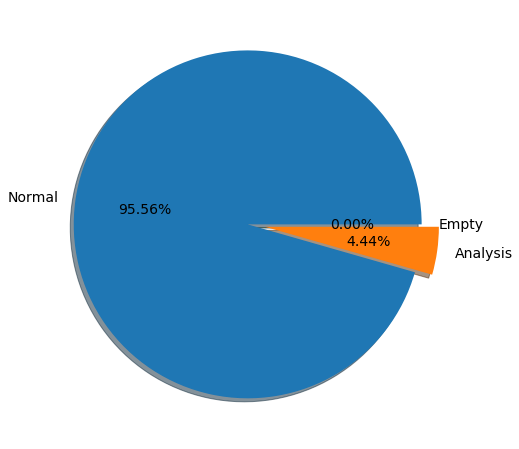

In [9]:
# normal_games = len(raw_games)-analysis_games-empty_games

# print("Number of total games: %d" % len(raw_games))
# print("Number of normal games: %d" % normal_games)
# print("Number of games with eval attached: %d" % analysis_games)
# print("Number of empty games: %d" % empty_games)

# explode = [0, 0.1, 0]
# plt.figure(figsize=(12, 8))
# labels = ['Normal', 'Analysis', 'Empty']
# pie_data = [normal_games/len(raw_games), analysis_games/len(raw_games), empty_games/len(raw_games)]
# plt.pie(pie_data, labels=labels, autopct='%1.2f%%', shadow=True, explode=explode, textprops={'fontsize': 14})
# plt.show()

empty_games

In [10]:
# print(empty_games)

0


In [9]:
del data

In [10]:
all_games = []
for i in range(len(raw_games)):
    if raw_games[i].find('eval') == -1 or raw_games[i].find('1.') == -1:
        continue
    else:
        all_games.append(raw_games[i])


In [26]:
all_games[40]

'"Rated Blitz game"]\\n[Site "https://lichess.org/dfBikitK"]\\n[White "dassattack"]\\n[Black "DerSaxe"]\\n[Result "0-1"]\\n[UTCDate "2017.03.31"]\\n[UTCTime "22:01:34"]\\n[WhiteElo "1555"]\\n[BlackElo "1536"]\\n[WhiteRatingDiff "-15"]\\n[BlackRatingDiff "+11"]\\n[ECO "A43"]\\n[Opening "Old Benoni Defense"]\\n[TimeControl "300+0"]\\n[Termination "Time forfeit"]\\n\\n1. d4 { [%eval 0.25] [%clk 0:05:00] } 1... c5 { [%eval 0.5] [%clk 0:05:00] } 2. c4?! { [%eval -0.13] [%clk 0:04:59] } 2... d6?! { [%eval 0.73] [%clk 0:04:57] } 3. e3 { [%eval 0.28] [%clk 0:04:57] } 3... g6 { [%eval 0.5] [%clk 0:04:55] } 4. Nf3 { [%eval 0.31] [%clk 0:04:56] } 4... Bg7 { [%eval 0.28] [%clk 0:04:53] } 5. Nc3 { [%eval 0.29] [%clk 0:04:52] } 5... Nf6 { [%eval 0.5] [%clk 0:04:48] } 6. Qa4+ { [%eval 0.07] [%clk 0:04:49] } 6... Bd7 { [%eval 0.15] [%clk 0:04:45] } 7. Qb3 { [%eval 0.05] [%clk 0:04:48] } 7... O-O { [%eval 0.18] [%clk 0:04:40] } 8. Qxb7 { [%eval -0.14] [%clk 0:04:45] } 8... Nc6 { [%eval -0.17] [%clk 0:0

In [17]:
del raw_games # remove old uncleaned version to save memory

In [18]:
len(all_games) # Remove eval games

996974

In [20]:
#  %store all_games
%store -r all_games

Stored 'all_games' (list)


In [21]:
all_games[666005].find("\\n1.")

410

In [22]:
index = all_games[40].find("[WhiteElo") + 10
print(index)


s = ""
while True:
    if all_games[40][index] == "\"":
        break
    s += all_games[40][index]
    index += 1

print(s)

173



In [66]:
text = re.compile(r'.*TimeControl')
for line in all_games[40].split('\\n'):
       if text.match(line):
            print(line)

[TimeControl "300+0"]


In [62]:
line

''

In [ ]:
%%time
PGN_list = []
opening_list = []
mode_list = []
result_list = []
avg_rating_list = []
rating_diff_list = []
termination_list = []
white_elo = []
black_elo = []
time_control = []
for game in all_games:
    # PGN
    index = game.find("\\n1. ") + 2
    while True:
        if game[index:index+2] == '0-' or game[index:index+2] == '1-' or game[index:index+2] == '1/':
            # Game termination
            break
        index += 1
    
    PGN_list.append(game[game.find("\\n1. ") + 2:index-1])
    
    #Opening
    index = game.find("[Opening") + 10
    s = ""
    while True:
        if game[index] == "\"":
            break
        s += game[index]
        index += 1
    opening_list.append(s)
    
    # Mode
    index = game.find("d") + 2
    s = ""
    while True:
        if game[index] == " ":
            break
        s += game[index]
        index += 1
    mode_list.append(s)
    
    # Result
    index = game.find('Result')+8
    result = game[index:index+2]
    if result == "1-":
        result_list.append("White Wins")
    elif result == "0-":
        result_list.append("Black Wins")
    elif result == "1/":
        result_list.append("Draw")
    
    # Rating
    w_rating = re.compile(r'.*WhiteElo')
    for line in game.split('\\n'):
        if w_rating.match(line):
            white_elo.append(re.findall(r"\d+",line))
    b_rating = re.compile(r'.*BlackElo')
    for line in game.split('\\n'):
        if b_rating.match(line):
            black_elo.append(re.findall(r"\d+",line))
            
    # Time Control
    tc = re.compile(r'.*TimeControl')
    for line in game.split('\\n'):
        if tc.match(line):
            time_control.append(line)

    # Termination
    index = game.find("[Termination")
    quotes = 0
    s = ""
    while quotes < 2:
        if game[index] == '"':
            quotes += 1
        elif quotes == 1:
            s += game[index]
        index += 1
    
    termination_list.append(s)

In [97]:
PGN_list

['1. d4 c5 2. e3 cxd4 3. exd4 d5 4. c3 Nc6 5. f4 e5 6. Nf3 e4 7. Ne5 f6 8. Qh5+ g6 9. Nxg6 hxg6 10. Qxh8 Kf7 11. Qh7+ Bg7 12. f5 g5 13. h4 gxh4 14. Bh6 Qf8 15. Rxh4 Nxh6 16. Rxh6 Ne7 17. Rh3 Bxf5 18. Qh4 Bxh3 19. Qxh3 Qh8 20. Qd7 Qh4+ 21. Kd2 Bh6+ 22. Kc2 Qf2+ 23. Nd2 Qxd2+ 24. Kb3 e3',
 '1. e4 e5 2. d3 Nf6 3. Nf3 d5 4. Nc3 Nc6 5. exd5 Nxd5 6. Nxd5 Qxd5 7. c4 Bb4+ 8. Bd2 Bxd2+ 9. Qxd2 Qd7 10. Be2 Qd6 11. O-O Bf5 12. Rfe1 O-O-O 13. b3 f6 14. Qe3 Bxd3 15. Bxd3 Qxd3 16. Qxd3 Rxd3 17. Nh4 Rhd8 18. Nf5 Rd8d7 19. Kh1 Nb4 20. Rec1 Rd3d2 21. a3 Nd3 22. Rcd1 Nxf2+ 23. Kg1 Nxd1 24. h3 Nc3 25. Rf1 Ne4 26. b4 Rd2d1 27. Ne7+ Rxe7 28. Rxd1 Rd7 29. Rxd7',
 '1. e4 d5 2. e5 Nc6 3. d4 g6 4. Bg5 Bg7 5. Nd2 f6 6. exf6 Nxf6 7. Nb3 e5 8. dxe5 Nxe5 9. Qe2 Qd6 10. O-O-O h6 11. f4 hxg5 12. fxe5 Qc6 13. exf6+ Kf7 14. fxg7 Bf5 15. gxh8=Q Rxh8 16. Nd4 Qc5 17. Ngf3 Re8 18. Qb5 b6 19. Qxc5 bxc5 20. Nxf5 gxf5 21. Rxd5 g4 22. Bb5 Re4 23. Ng5+',
 '1. e4 e5 2. Nf3 d6 3. Bc4 h6 4. Bb3 Nf6 5. Nc3 Qe7 6. O-O c6 7. h3 Be6 

In [98]:
chess_df = pd.DataFrame({})
chess_df['PGN'] = PGN_list
chess_df['Mode'] = mode_list
chess_df['Result'] = result_list
chess_df['Termination Type'] = termination_list
chess_df['White_Elo'] = white_elo
chess_df['Balck_Elo'] = black_elo
chess_df['time_control'] = time_control
chess_df['opening'] = opening_list


In [99]:
EXPORT = True

if EXPORT:
    chess_df.to_csv("~/chess/chess/data/lichess-04-2017.csv", index=True, header=True)